<a href="https://colab.research.google.com/github/livingmangal/MACHINE_LEARNING_PRODIGY/blob/main/PRODIGY_ML_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"livingmangalsingh","key":"7e2a3239ce7f48732f9448566a7ce120"}'}

In [ ]:
import os
import zipfile

# Move kaggle.json to the right place
os.makedirs("/root/.kaggle", exist_ok=True)
os.rename("kaggle.json", "/root/.kaggle/kaggle.json")

# Give permission
!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 96% 1.02G/1.06G [00:10<00:01, 26.0MB/s]
100% 1.06G/1.06G [00:10<00:00, 110MB/s] 


In [ ]:
with zipfile.ZipFile("dogs-vs-cats.zip", 'r') as zip_ref:
    zip_ref.extractall("cats_dogs_train")


In [ ]:
#Load Data
DATA_DIR = "cats_dogs_train/dogs_vs_cats/train"
IMG_SIZE = 64


In [ ]:
import os
import cv2
import numpy as np

def load_data_from_folders(base_dir):
    X = []
    y = []
    categories = ['cats', 'dogs']  # folder names

    for label, category in enumerate(categories):
        folder_path = os.path.join(base_dir, category)
        for img_name in os.listdir(folder_path):
            try:
                img_path = os.path.join(folder_path, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                X.append(img.flatten())  # Flatten to 1D
                y.append(label)          # 0 for cats, 1 for dogs
            except Exception as e:
                print(f"❌ Error loading {img_name}: {e}")
    return np.array(X), np.array(y)


🔄 Loading data...
✅ Loaded 5000 images
🚀 Training SVM...
🎯 Accuracy: 0.5270
              precision    recall  f1-score   support

         cat       0.53      0.55      0.54       505
         dog       0.52      0.50      0.51       495

    accuracy                           0.53      1000
   macro avg       0.53      0.53      0.53      1000
weighted avg       0.53      0.53      0.53      1000



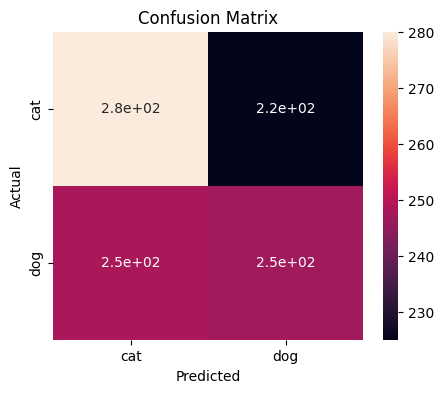

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Load data
print("🔄 Loading data...")
X, y = load_data_from_folders(DATA_DIR)

# Shuffle the data before slicing
X, y = shuffle(X, y, random_state=42)

# Then slice or split
X = X[:5000]
y = y[:5000]
print(f"✅ Loaded {len(X)} images")


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train SVM
print("🚀 Training SVM...")
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"🎯 Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=["cat", "dog"]))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels=["cat", "dog"], yticklabels=["cat", "dog"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

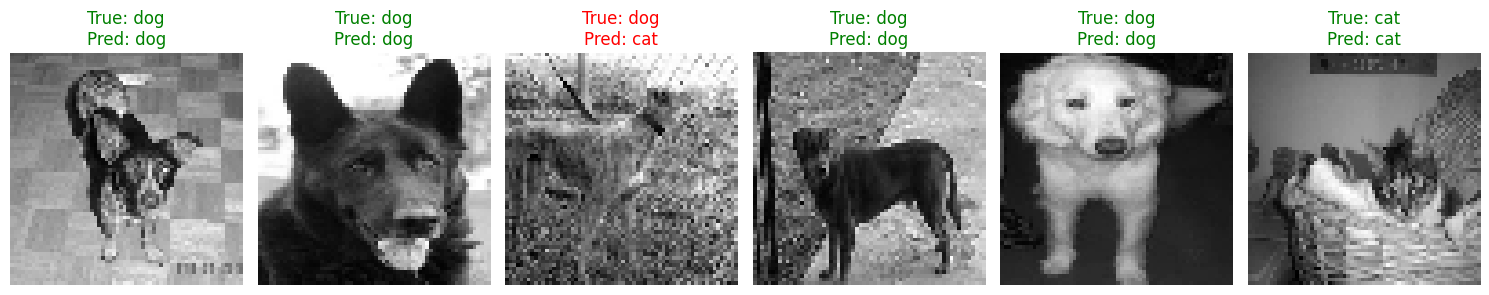

In [ ]:
def show_predictions(X_test, y_test, y_pred, samples=6):
    plt.figure(figsize=(15, 4))
    for i in range(samples):
        idx = np.random.randint(0, len(X_test))
        img = X_test[idx].reshape(IMG_SIZE, IMG_SIZE)
        true = "cat" if y_test[idx] == 0 else "dog"
        pred = "cat" if y_pred[idx] == 0 else "dog"
        color = "green" if true == pred else "red"
        plt.subplot(1, samples, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f"True: {true}\nPred: {pred}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_predictions(X_test, y_test, y_pred)
